In [7]:
# ===================================
# !!! SET UP PATH AND MERGE FILES !!!
# ===================================

import csv
import numpy as np
import pandas as pd


path = '/home/ambra/Desktop/cluster-morgana/run0406_1000x_190523/run0406/run0406_ID000126/csv/'

texp = [1,5,10,100]
sigma = [5]
chunk = [i+1 for i in range(5)]

#csvName[texp][chunk]
csvName = [[]*i for i in range(len(texp))]
for i in range(len(chunk)) :  
    for j in range(len(texp)) :
        csvName[j].append('run0406_v07_%ds_chunk%02d.csv' % (texp[j], chunk[i]))
        
# merge files ---!
csvMerged= []
for j in range(len(texp)) :
    csvMerged.append('run0406_1000x_%ds.csv' % texp[j])

    fout = open(path+csvMerged[j],'w+')
    # first file ---!
    for line in open(path+csvName[j][0]):
        fout.write(line)
    # remaining files ---!    
    for i in range(len(chunk)-1):
        f = open(path+csvName[j][i+1])
        next(f) # skip the header ---!
        for line in f:
             fout.write(line)
        f.close() 
    fout.close()
    
print(csvMerged)

['run0406_1000x_1s.csv', 'run0406_1000x_5s.csv', 'run0406_1000x_10s.csv', 'run0406_1000x_100s.csv']


In [8]:
# ===================================
# !!! NORMED HISTOGRAMS FUNCTIONS !!!
# ===================================

import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib as mpl;

def plot_tsv_norm(ax, filename):
    
    height, binEdges = np.histogram(tsv, bins=30, density=False)
    height_norm = height/len(tsv)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    width = (tsv.max()-tsv.min())/30
    error_norm = np.sqrt(height)/len(tsv)

    ax.bar(bincenters, height_norm, width=width, color='b', yerr=error_norm, 
           label='%d'%perc+'$\%$ trials')
    ax.plot([], [], 'k-', label="normalized errors")
    plt.xlabel('Test Statistic Value [$\\approx \\sigma^2$]', fontsize=16)
    plt.ylabel('normalized cts', fontsize=16)
    plt.title('TS distribution for texp=%ds (1000 trials)' %texp[n], fontsize=16)
    ax.legend(loc=0)
    
    # savefig ---!
    figname = '_tsv'
    extent = ax.get_window_extent().transformed(fig_hist.dpi_scale_trans.inverted())
    fig_hist.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.3, 1.4))

    
    
    
def plot_det_norm(ax, filename):
    
    height, binEdges = np.histogram(distance_det, bins=30, density=False)
    height_norm = height/len(distance_det)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    width = (max(distance_det)-min(distance_det))/30
    error_norm = np.sqrt(height)/len(distance_det)

    print('!!! check:', width)

    ax.bar(bincenters, height_norm, width=width, color='g', yerr=error_norm, 
            label='%d'%perc+'$\%$ trials')
    ax.plot([], [], 'k-', label="normalized errors")
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('normalized cts', fontsize=16)
    plt.title('detected Ra/Dec for texp=%ds (1000 trials)' %texp[n], fontsize=16)
    ax.legend(loc=0)

    # save only subplot with padding ---!
    figname = '_detSphDist_histAll'
    extent = ax.get_window_extent().transformed(fig_hist.dpi_scale_trans.inverted())
    fig_hist.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.3, 1.4))


    
def plot_det2_norm(ax, filename):
    
    height, binEdges = np.histogram(d_det, bins=30, density=False)
    height_norm = height/len(d_det)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    width = (max(d_det)-min(d_det))/30 
    error_norm = np.sqrt(height)/len(d_det)
    
    ax.bar(bincenters, height_norm, width=width, color='g', yerr=error_norm, 
            label='%d'%perc_det+'$\%$ detections')
    ax.plot([], [], 'k-', label="normalized errors")
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('normalized cts', fontsize=16)
    plt.title('detected Ra/Dec for texp=%ds (zoom in $\Delta\\Theta<$0.5deg)' %texp[n], fontsize=16)
    ax.legend(loc=0)

    # save only subplot with padding ---!
    figname = '_detSphDist_histNear'
    extent = ax.get_window_extent().transformed(fig_hist.dpi_scale_trans.inverted())
    fig_hist.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.3, 1.4))

    
    
def plot_fit_norm(ax, filename):
    
    height, binEdges = np.histogram(distance_fit, bins=30, density=False)
    height_norm = height/len(distance_fit)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    width = (max(distance_fit)-min(distance_fit))/30
    error_norm = np.sqrt(height)/len(distance_fit)

    ax.bar(bincenters, height_norm, width=width, color='r', yerr=error_norm, 
            label='%d'%perc+'$\%$ trials')
    ax.plot([], [], 'k-', label="normalized errors")
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('normalized cts', fontsize=16)
    plt.title('fitted Ra/Dec for texp=%ds (1000 trials)' %texp[n], fontsize=16)
    ax.legend(loc=0)

    # save only subplot with padding ---!
    figname = '_fitSphDist_histAll'
    extent = ax.get_window_extent().transformed(fig_hist.dpi_scale_trans.inverted())
    fig_hist.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.3, 1.4))


    
def plot_fit2_norm(ax, filename):
    
    height, binEdges = np.histogram(d_fit, bins=30, density=False)
    height_norm = height/len(d_fit)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    width = (max(d_fit)-min(d_fit))/30 
    error_norm = np.sqrt(height)/len(d_fit)
    
    print('!!! check:', width)

    ax.bar(bincenters, height_norm, width=width, color='r', yerr=error_norm, 
            label='%d'%perc_fit+'$\%$ detections')
    ax.plot([], [], 'k-', label="normalized errors")
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('normalized cts', fontsize=16)
    plt.title('fitted Ra/Dec for texp=%ds (zoom in $\Delta\\Theta<$0.5deg)' %texp[n], fontsize=16)
    ax.legend(loc=0)

    # save only subplot with padding ---!
    figname = '_fitSphDist_histNear'
    extent = ax.get_window_extent().transformed(fig_hist.dpi_scale_trans.inverted())
    fig_hist.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.3, 1.4))

    
    
def plot_tsv_det(ax, filename, n) :
    

    if n == 0 :
        h = ax.hist2d(distance_det, tsv, bins=30, cmap='jet', normed=True,
# v01                     norm = mpl.colors.Normalize(vmin=0.,vmax=1))
# v02                     norm = mpl.colors.Normalize(vmin=0.,vmax=0.2))
                     norm = mpl.colors.LogNorm(vmin=1e-3,vmax=1.))    
    else :
        h = ax.hist2d(distance_det, tsv, bins=30, cmap='jet', normed=True,
                     norm = mpl.colors.Normalize(vmin=0.,vmax=1.))        
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('tsv', fontsize=16)
    plt.title('detected Ra/Dec vs TS for texp=%ds' %texp[n], fontsize=16)
    plt.colorbar(h[3], ax=ax).set_label('normalized cts') 
    
    # save only subplot with padding ---!
    figname = '_tsv2D_detAll'
    extent = ax.get_window_extent().transformed(fig_hist2D.dpi_scale_trans.inverted())
    fig_hist2D.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.5, 1.4))

    

def plot_tsv_det2(ax, filename) :
     
    h = ax.hist2d(d_det, d_det_tsv, bins=30, cmap='jet', normed=True)
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('tsv', fontsize=16)
    plt.title('detected Ra/Dec vs TS for texp=%ds \n(zoom in $\Delta\\Theta<$0.5deg)' %texp[n], 
              fontsize=16)
    plt.colorbar(h[3], ax=ax).set_label('cts') 
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    
    # save only subplot with padding ---!
    figname = '_tsv2D_detNear'
    extent = ax.get_window_extent().transformed(fig_hist2D.dpi_scale_trans.inverted())
    fig_hist2D.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.5, 1.4))
 
    


def plot_tsv_fit(ax, filename, n) :
    

    if n == 0 :
        h = ax.hist2d(distance_fit, distance_fit_tsv, bins=30, cmap='jet', normed=True,
# v01                     norm = mpl.colors.Normalize(vmin=0.,vmax=1))
# v02                     norm = mpl.colors.Normalize(vmin=0.,vmax=0.015))
                     norm = mpl.colors.LogNorm(vmin=1e-3,vmax=1.))
    else :
        h = ax.hist2d(distance_fit, tsv, bins=30, cmap='jet', normed=True,
                     norm = mpl.colors.Normalize(vmin=0.,vmax=1.))        
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('tsv', fontsize=16)
    plt.title('fitted Ra/Dec vs TS for texp=%ds' %texp[n], fontsize=16)
    plt.colorbar(h[3], ax=ax).set_label('cts') 
    
    # save only subplot with padding ---!
    figname = '_tsv2D_fitAll'
    extent = ax.get_window_extent().transformed(fig_hist2D.dpi_scale_trans.inverted())
    fig_hist2D.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.5, 1.4))

    

def plot_tsv_fit2(ax, filename) :
     
    h = ax.hist2d(d_fit, d_fit_tsv, bins=30, cmap='jet', normed=True)
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('tsv', fontsize=16)
    plt.title('fitted Ra/Dec vs TS for texp=%ds \n(zoom in $\Delta\\Theta<$0.5deg)' %texp[n], 
              fontsize=16)
    plt.colorbar(h[3], ax=ax).set_label('cts') 
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    
    # save only subplot with padding ---!
    figname = '_tsv2D_fitNear'
    extent = ax.get_window_extent().transformed(fig_hist2D.dpi_scale_trans.inverted())
    fig_hist2D.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.5, 1.4))
 
    


DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 88.40764331210191
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 92.41011984021304
!!! check: 0.13493632398687436
!!! check: 0.006660088900197007


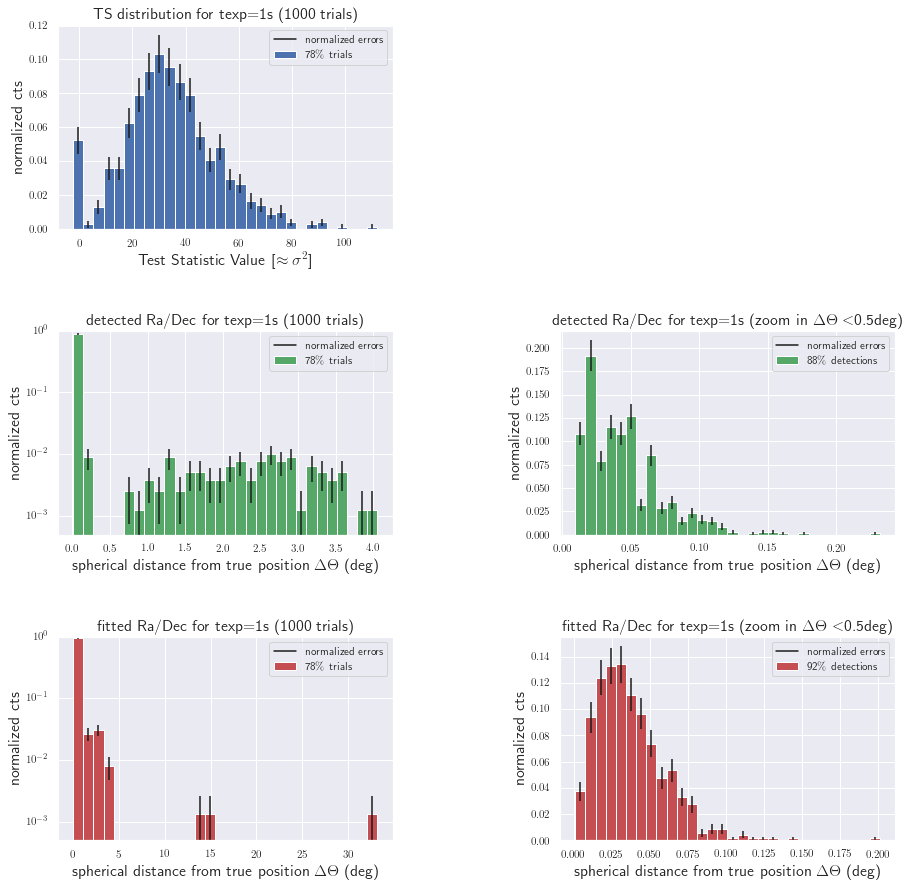

DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
!!! check: 0.0027868107369068912


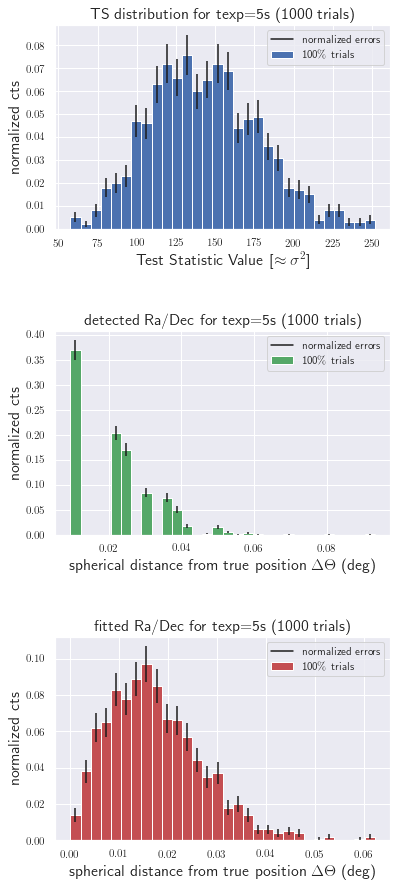

DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
!!! check: 0.0014406996335435338


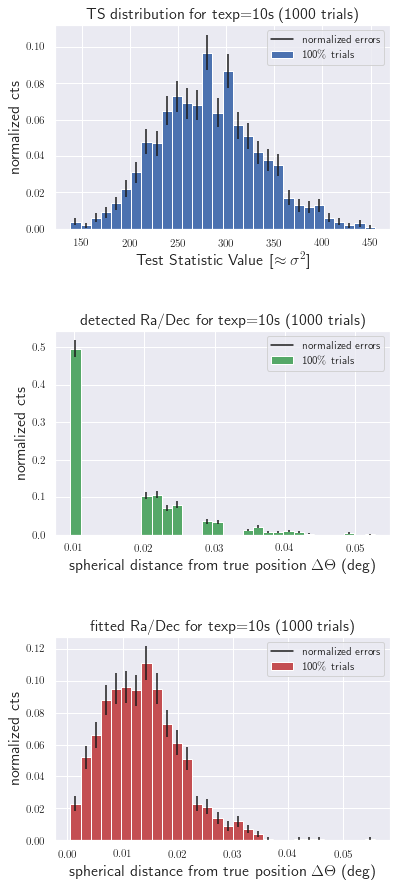

DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
!!! check: 0.0006639147805227386


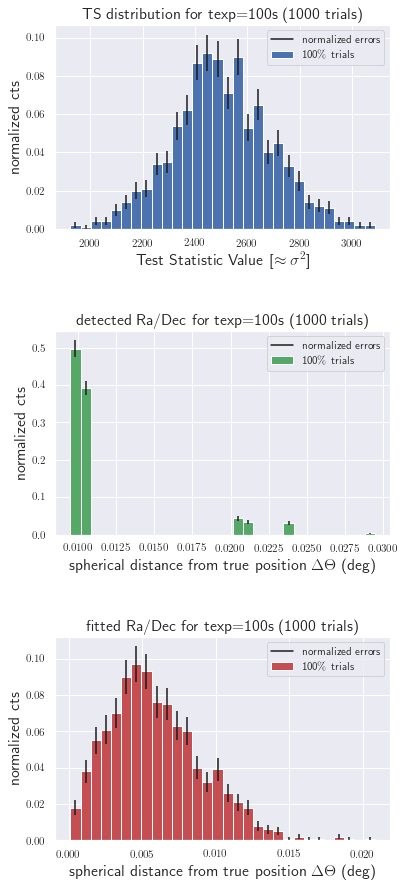

In [9]:
# ===============================
# !!! TSV & RA/DEC HISTOGRAMS !!!
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord

for n in range(4) :  
    
    # store values ---!
    filename = csvMerged[n]
    
    # load DataFrame and column names ---!
    df = pd.read_csv(path+filename)
    cols = list(df.columns)
    trials = len(df[cols[0]])
    # drop NaN ---!
    df = df.dropna()
    
    # set arrays ---!
    trial = np.array(df[cols[0]])
    tsv = np.array(df[cols[12]])
    raSrc001 = np.array(df[cols[5]])
    decSrc001 = np.array(df[cols[6]])
    raFit = np.array(df[cols[7]])
    decFit = np.array(df[cols[8]])
#    ra_err = np.array(df[cols[9]])
#x    dec_err = np.array(df[cols[10]])
    
    # initialize SphDistance calc ---!
    trueRA = 33.057
    trueDEC = -51.841
    
    perc = 100 * (len(trial)/trials)
    
    distance_det = []
    d_det = []

    # DETECTION ---!
    # spherical distance (great circle not small angle approx) ---!
    true_coord = SkyCoord(ra = trueRA*u.deg, dec = trueDEC*u.deg, frame='fk5')
    
    for i in range(len(raSrc001)) :
        detect_coord = SkyCoord(ra = raSrc001[i]*u.deg, dec = decSrc001[i]*u.deg, frame='fk5')
        distance_det.append(float(true_coord.separation(detect_coord).deg))      
     
    for i in range(len(distance_det)) :
        if distance_det[i] < 0.5 :
            d_det.append(distance_det[i])

#    perc_det = 100 * (len(d_det)/trials)
    perc_det = 100 * (len(d_det)/len(distance_det))
    print('DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION:', perc_det)

    # FIT MAX LIKELIHOOD ---!
    distance_fit = []
    d_fit = []

    for i in range(len(raFit)) :
        if decFit[i] >= -90 and decFit[i] <= 90 and 0 <= raFit[i] <= 360 :
            fit_coord = SkyCoord(ra = raFit[i]*u.deg, dec = decFit[i]*u.deg, frame='fk5')
            distance_fit.append(float(true_coord.separation(fit_coord).deg))                  
    
    for i in range(len(distance_fit)) :
        if distance_fit[i] < 0.5 :
            d_fit.append(distance_fit[i])
        
#    perc_fit = len(d_fit)/trials * 100
    perc_fit = len(d_fit)/len(distance_fit) * 100
    print('FIT RATIO WITHIN 0.5deg FROM TRUE POSITION:', perc_fit)

    # INITIALIZE PLOT ---!
    fig_hist = plt.figure(figsize=(15, 15))
    plt.rc('text', usetex=True)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.set()
    
    # PLOT TSV ---!
    ax_tsv_norm = plt.subplot(321)
    plot_tsv_norm(ax_tsv_norm, filename)
    
    # PLOT FLUX FIT MAX LIKELIHOOD ---!
#    ax_flux = plt.subplot(322)
#    plot_flux(ax_flux, filename)
    
    # PLOT RA&DEC DETECTION ---!    
    if n==0 :
        ax_det2_norm = plt.subplot(324)
        plot_det2_norm(ax_det2_norm, filename)
        ax_det_norm = plt.subplot(323, ylim=(5e-4, 1), yscale='log')
        plot_det_norm(ax_det_norm, filename) 
    
    else :
        ax_det_norm = plt.subplot(323)
        plot_det_norm(ax_det_norm, filename) 
        
    # PLOT RA&DEC FIT MAX LIKELIHOOD ---!    
    if n==0 :
        ax_fit2_norm = plt.subplot(326)
        plot_fit2_norm(ax_fit2_norm, filename)
        ax_fit_norm = plt.subplot(325, ylim=(5e-4, 1), yscale='log')
        plot_fit_norm(ax_fit_norm, filename) 
    
    else :
        ax_fit_norm = plt.subplot(325)
        plot_fit_norm(ax_fit_norm, filename) 
    
    
    plt.show()

DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 88.40764331210191
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 92.41011984021304


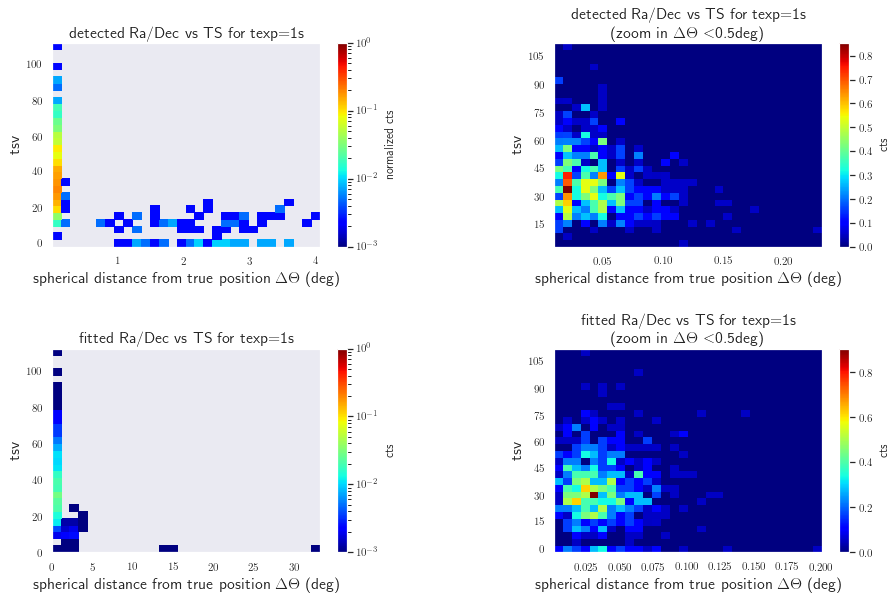

DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0


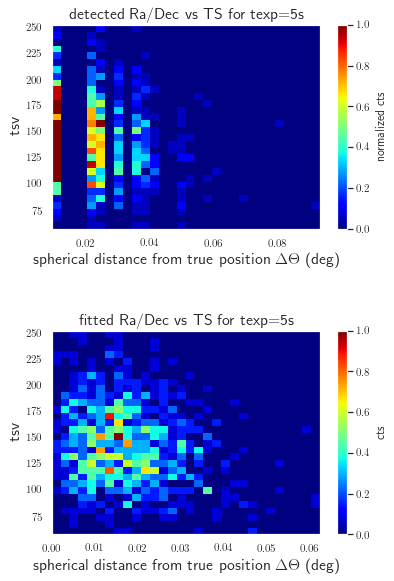

DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0


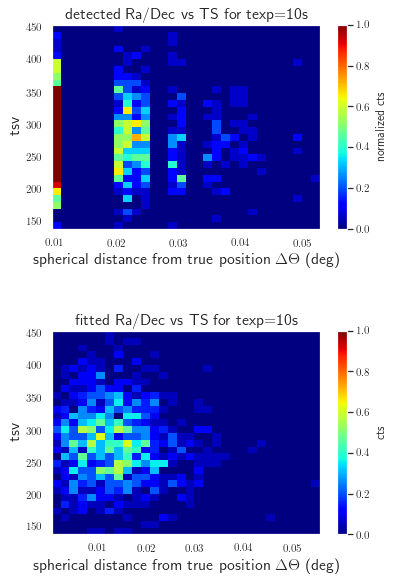

DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0


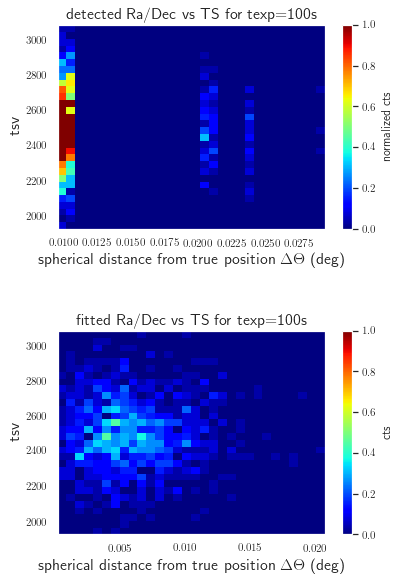

In [128]:
# ========================================================
# !!! TSV & RA/DEC HISTOGRAMS 2D + SPECTRAL HISTOGRAMS !!!
# ========================================================

import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib.ticker import MaxNLocator


for n in range(4) :  

    # store values ---!
    filename = csvMerged[n]
    
    # load DataFrame and column names ---!
    df = pd.read_csv(path+filename)
    cols = list(df.columns)
    trials = len(df[cols[0]])
    # drop NaN ---!
    df = df.dropna()
    
    # set arrays ---!
    trial = np.array(df[cols[0]])
    tsv = np.array(df[cols[12]])
    raSrc001 = np.array(df[cols[5]])
    decSrc001 = np.array(df[cols[6]])
    raFit = np.array(df[cols[7]])
    decFit = np.array(df[cols[8]])
#    ra_err = np.array(df[cols[9]])
#    dec_err = np.array(df[cols[10]])
    
    # initialize SphDistance calc ---!
    trueRA = 33.057
    trueDEC = -51.841
    
    perc = 100 * (len(trial)/trials)
    
    distance_det = []
    d_det = []
    d_det_tsv = []

    # DETECTION ---!
    # spherical distance (great circle not small angle approx) ---!
    true_coord = SkyCoord(ra = trueRA*u.deg, dec = trueDEC*u.deg, frame='fk5')
    
    for i in range(len(raSrc001)) :
        detect_coord = SkyCoord(ra = raSrc001[i]*u.deg, dec = decSrc001[i]*u.deg, frame='fk5')
        distance_det.append(float(true_coord.separation(detect_coord).deg))      
     
    for i in range(len(distance_det)) :
        if distance_det[i] < 0.5 :
            d_det.append(distance_det[i])
            d_det_tsv.append(tsv[i])

#    perc_det = 100 * (len(d_det)/trials)
    perc_det = 100 * (len(d_det)/len(distance_det))
    print('DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION:', perc_det)

    # FIT MAX LIKELIHOOD ---!
    distance_fit = []
    distance_fit_tsv = []
    d_fit = []
    d_fit_tsv = []

    for i in range(len(raFit)) :
        if decFit[i] >= -90 and decFit[i] <= 90 and 0 <= raFit[i] <= 360 :
            fit_coord = SkyCoord(ra = raFit[i]*u.deg, dec = decFit[i]*u.deg, frame='fk5')
            distance_fit.append(float(true_coord.separation(fit_coord).deg))         
            distance_fit_tsv.append(tsv[i])
    
    for i in range(len(distance_fit)) :
        if distance_fit[i] < 0.5 :
            d_fit.append(distance_fit[i])
            d_fit_tsv.append(tsv[i])
        
#    perc_fit = len(d_fit)/trials * 100
    perc_fit = len(d_fit)/len(distance_fit) * 100
    print('FIT RATIO WITHIN 0.5deg FROM TRUE POSITION:', perc_fit)
    
    # INITIALIZE PLOT ---!
    fig_hist2D = plt.figure(figsize=(15, 15))
    plt.rc('text', usetex=True)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.set()
    
    # PLOT TSV & DET ---!
    if n==0 :
        ax_tsv_det2 = plt.subplot(322)
        plot_tsv_det2(ax_tsv_det2, filename)
        ax_tsv_det = plt.subplot(321)
        plot_tsv_det(ax_tsv_det, filename, n)    
    else :
        ax_tsv_det = plt.subplot(321)
        plot_tsv_det(ax_tsv_det, filename, n)

    
    # PLOT TSV & FIT ---!
    if n==0 :
        ax_tsv_fit2 = plt.subplot(324)
        plot_tsv_fit2(ax_tsv_fit2, filename)
        ax_tsv_fit = plt.subplot(323)
        plot_tsv_fit(ax_tsv_fit, filename, n)    
    else :
        ax_tsv_fit = plt.subplot(323)
        plot_tsv_fit(ax_tsv_fit, filename, n)
 
    # PLOT PREFACTOR & ERRORS ---!    
       
    # PLOT INDEX & ERROR ---!    
   
    
    plt.show()